In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kstest
from scipy.stats import binom
from scipy.stats import pearsonr
from matplotlib import cm
cmap = cm.get_cmap('Dark2')
%matplotlib inline

In [2]:
# shuffle and drop timestamp to keep privacy
df = pd.read_csv('Preferencias de hornallas.csv').sample(frac=1, random_state=0).reset_index(drop=True).drop(['Timestamp'], axis=1)
df

,Género,Edad,Altura en metros,Hornalla favorita,¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha],¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha],La cocina es,¿Con qué encendés las hornallas?,¿Con qué frecuencia usás una hornalla?,¿Cuál es tu mano más hábil?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa?,¿Hacia qué lado del anafe tenés mesada?
0,Hombre,27.0,1.80,Adelante derecha,Alta,Alta,Alta,Alta,Eléctrica,Es automático,Todos los días,Derecha,No,No,Izquierda
1,Mujer,25.0,1.65,Adelante derecha,Funciona mal,Baja,Media,No tengo,A gas,Encendedor;Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Derecha
2,Mujer,24.0,1.56,Adelante izquierda,Baja,Alta,Media,Alta,A gas,Encendedor,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
3,Mujer,22.0,1.63,Adelante izquierda,Media,Alta,Baja,Baja,A gas,Fósforos,Todos los días,Izquierda,No,No,Derecha
4,Mujer,48.0,1.55,Atrás izquierda,Media,Media,Baja,No tengo,A gas,Encendedor,Todos los días,Derecha,No,No,Izquierda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,Mujer,22.0,1.60,Adelante derecha,Alta,Baja,Media,Alta,A gas,Es automático,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
4945,Hombre,38.0,1.75,Atrás derecha,Alta,Alta,Alta,Alta,A gas,Encendedor,Todos los días,Derecha,No,No,Derecha
4946,Mujer,25.0,1.61,Adelante izquierda,Funciona mal,Media,Baja,Media,A gas,Encendedor,Todos los días,Izquierda,No,No,Izquierda
4947,Hombre,22.0,1.72,Adelante izquierda,Alta,Alta,Baja,Media,A gas,Encendedor,Día por medio,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda


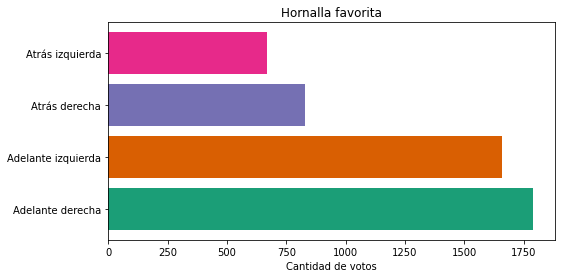

In [3]:
df0 = df['Hornalla favorita'].value_counts()
plt.subplots(1, 1, figsize=(8, 4))
plt.barh(y=df0.index, width=df0.values, color=[cmap(i) for i in range(4)])
plt.title('Hornalla favorita')
plt.xlabel('Cantidad de votos')
None

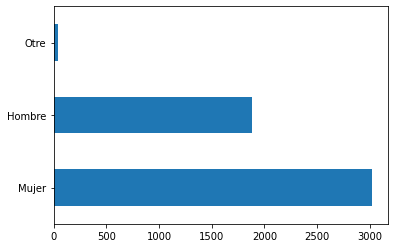

In [4]:
df['Género'].value_counts().plot(kind='barh');

In [5]:
(df['Altura en metros'] > 2.1).sum()

142

In [6]:
((df['Altura en metros'] > 120) & (df['Altura en metros'] < 210)).sum()

132

In [7]:
df[(((df['Altura en metros'] > 2.1) & (df['Altura en metros'] < 120)) | (df['Altura en metros'] > 210))]

,Género,Edad,Altura en metros,Hornalla favorita,¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha],¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha],La cocina es,¿Con qué encendés las hornallas?,¿Con qué frecuencia usás una hornalla?,¿Cuál es tu mano más hábil?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa?,¿Hacia qué lado del anafe tenés mesada?
86,Hombre,26.0,2.750000,Atrás izquierda,Alta,Media,Media,Alta,A gas,Fósforos;Botón de la cocina,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
126,Mujer,32.0,33.000000,Atrás izquierda,Alta,Alta,Alta,Alta,A gas,Encendedor;Magiclik,Todos los días,Derecha,Sí,"Sí, pero no creo que tocarían el fuego",Izquierda
205,Hombre,26.0,3.141593,Adelante izquierda,Alta,Media,Alta,Baja,A gas,Botón de la cocina;solo la de adelante izquier...,Todos los días,Derecha,No,No,Derecha;Al frente
1087,Hombre,40.0,17.000000,Adelante izquierda,Baja,Media,Baja,Funciona mal,A gas,Fósforos,Todos los días,Derecha,Sí,No,Derecha
3232,Mujer,24.0,24.000000,Adelante izquierda,Media,Alta,Baja,Media,A gas,Botón de la cocina,Dos o tres veces por semana,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
3234,Mujer,36.0,36.000000,Adelante derecha,Alta,Funciona mal,Alta,Alta,A gas,Encendedor;Magiclik;Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Derecha
3276,Hombre,22.0,2.270000,Atrás derecha,Alta,Alta,Alta,Alta,A gas,Encendedor,Todos los días,Izquierda;Derecha,No,"Sí, pero no creo que tocarían el fuego",Derecha
3757,Hombre,27.0,2.770000,Atrás derecha,Media,Media,Media,Alta,A gas,Encendedor;Fósforos;Botón de la cocina,Una vez por semana o menos,Izquierda,No,"Sí, pero no creo que tocarían el fuego",Derecha
3935,Hombre,21.0,4.930000,Atrás izquierda,Alta,Alta,Alta,Alta,Eléctrica,Botón de la cocina,Dos o tres veces por semana,Derecha,No,"Sí, y creo que tocarían el fuego",Derecha
4566,Hombre,23.0,250.000000,Adelante izquierda,Alta,Alta,Alta,Media,A gas,Encendedor,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Al frente


In [8]:
df = df[~(((df['Altura en metros'] > 2.1) & (df['Altura en metros'] < 120)) | (df['Altura en metros'] > 210))].reset_index(drop=True)
df

,Género,Edad,Altura en metros,Hornalla favorita,¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha],¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha],La cocina es,¿Con qué encendés las hornallas?,¿Con qué frecuencia usás una hornalla?,¿Cuál es tu mano más hábil?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa?,¿Hacia qué lado del anafe tenés mesada?
0,Hombre,27.0,1.80,Adelante derecha,Alta,Alta,Alta,Alta,Eléctrica,Es automático,Todos los días,Derecha,No,No,Izquierda
1,Mujer,25.0,1.65,Adelante derecha,Funciona mal,Baja,Media,No tengo,A gas,Encendedor;Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Derecha
2,Mujer,24.0,1.56,Adelante izquierda,Baja,Alta,Media,Alta,A gas,Encendedor,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
3,Mujer,22.0,1.63,Adelante izquierda,Media,Alta,Baja,Baja,A gas,Fósforos,Todos los días,Izquierda,No,No,Derecha
4,Mujer,48.0,1.55,Atrás izquierda,Media,Media,Baja,No tengo,A gas,Encendedor,Todos los días,Derecha,No,No,Izquierda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,Mujer,22.0,1.60,Adelante derecha,Alta,Baja,Media,Alta,A gas,Es automático,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
4935,Hombre,38.0,1.75,Atrás derecha,Alta,Alta,Alta,Alta,A gas,Encendedor,Todos los días,Derecha,No,No,Derecha
4936,Mujer,25.0,1.61,Adelante izquierda,Funciona mal,Media,Baja,Media,A gas,Encendedor,Todos los días,Izquierda,No,No,Izquierda
4937,Hombre,22.0,1.72,Adelante izquierda,Alta,Alta,Baja,Media,A gas,Encendedor,Día por medio,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda


In [9]:
df['Altura en metros'] = df['Altura en metros'].apply(lambda h: h if h < 3 else (h / 100))
df

,Género,Edad,Altura en metros,Hornalla favorita,¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha],¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha],La cocina es,¿Con qué encendés las hornallas?,¿Con qué frecuencia usás una hornalla?,¿Cuál es tu mano más hábil?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa?,¿Hacia qué lado del anafe tenés mesada?
0,Hombre,27.0,1.80,Adelante derecha,Alta,Alta,Alta,Alta,Eléctrica,Es automático,Todos los días,Derecha,No,No,Izquierda
1,Mujer,25.0,1.65,Adelante derecha,Funciona mal,Baja,Media,No tengo,A gas,Encendedor;Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Derecha
2,Mujer,24.0,1.56,Adelante izquierda,Baja,Alta,Media,Alta,A gas,Encendedor,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
3,Mujer,22.0,1.63,Adelante izquierda,Media,Alta,Baja,Baja,A gas,Fósforos,Todos los días,Izquierda,No,No,Derecha
4,Mujer,48.0,1.55,Atrás izquierda,Media,Media,Baja,No tengo,A gas,Encendedor,Todos los días,Derecha,No,No,Izquierda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,Mujer,22.0,1.60,Adelante derecha,Alta,Baja,Media,Alta,A gas,Es automático,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
4935,Hombre,38.0,1.75,Atrás derecha,Alta,Alta,Alta,Alta,A gas,Encendedor,Todos los días,Derecha,No,No,Derecha
4936,Mujer,25.0,1.61,Adelante izquierda,Funciona mal,Media,Baja,Media,A gas,Encendedor,Todos los días,Izquierda,No,No,Izquierda
4937,Hombre,22.0,1.72,Adelante izquierda,Alta,Alta,Baja,Media,A gas,Encendedor,Día por medio,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda


In [10]:
df.iloc[df['Altura en metros'].sort_values().head(10).index.tolist()]

,Género,Edad,Altura en metros,Hornalla favorita,¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha],¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha],La cocina es,¿Con qué encendés las hornallas?,¿Con qué frecuencia usás una hornalla?,¿Cuál es tu mano más hábil?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa?,¿Hacia qué lado del anafe tenés mesada?
2494,Hombre,28.0,0.80,Adelante izquierda,Funciona mal,Alta,Alta,No tengo,A gas,Magiclik,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
3968,Mujer,24.0,1.00,Adelante derecha,Alta,Alta,Alta,Alta,A gas,Encendedor;Magiclik,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
3066,Mujer,30.0,1.00,Adelante derecha,Media,Media,Alta,Media,A gas,Encendedor;Fósforos,Todos los días,Derecha,No,No,Derecha
3304,Hombre,20.0,1.10,Atrás derecha,Media,Baja,Media,Alta,A gas,Botón de la cocina,Todos los días,Derecha,Sí,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
4346,Mujer,38.0,1.10,Adelante derecha,Baja,Media,Media,Baja,A gas,Encendedor,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
190,Hombre,19.0,1.40,Adelante derecha,Media,Baja,Media,Baja,A gas,Encendedor;Magiclik;Fósforos,Todos los días,Izquierda,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
3146,Mujer,30.0,1.40,Atrás derecha,Media,Baja,Media,Alta,A gas,Fósforos,Dos o tres veces por semana,Derecha,No,No,Izquierda;Derecha
1594,Mujer,20.0,1.40,Adelante izquierda,Baja,Media,Baja,Media,A gas,Encendedor;Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
1941,Mujer,25.0,1.42,Adelante derecha,Media,Media,Media,Media,A gas,Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
2413,Mujer,51.0,1.43,Adelante izquierda,Alta,Media,Baja,Media,A gas,Magiclik,Todos los días,Derecha,No,No,Izquierda;Derecha


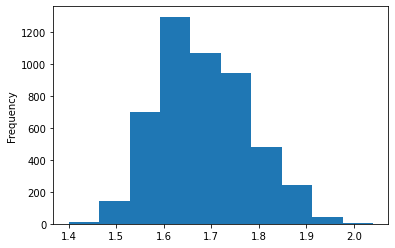

In [11]:
df[df['Altura en metros'] >= 1.4]['Altura en metros'].plot(kind='hist', bins=10);

In [12]:
df['Edad'].sort_values()

3197       5.0
4819      15.0
3996      15.0
1078      15.0
413       15.0
         ...  
4485     221.0
2237     451.0
982      571.7
3223     711.0
1880    4317.0
Name: Edad, Length: 4939, dtype: float64

In [13]:
df['Edad'].sort_values().tail(20)

267       67.0
3977      67.0
559       68.0
4299      68.0
2708      69.0
4416      69.0
3174      70.0
836       70.0
1994      70.0
901       70.0
4450      73.0
1328      73.0
2054      78.0
3395      90.0
4076      99.0
4485     221.0
2237     451.0
982      571.7
3223     711.0
1880    4317.0
Name: Edad, dtype: float64

In [14]:
df = df[(df['Edad'] >= 15) & (df['Edad'] < 100)].reset_index(drop=True)
df

,Género,Edad,Altura en metros,Hornalla favorita,¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha],¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha],La cocina es,¿Con qué encendés las hornallas?,¿Con qué frecuencia usás una hornalla?,¿Cuál es tu mano más hábil?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa?,¿Hacia qué lado del anafe tenés mesada?
0,Hombre,27.0,1.80,Adelante derecha,Alta,Alta,Alta,Alta,Eléctrica,Es automático,Todos los días,Derecha,No,No,Izquierda
1,Mujer,25.0,1.65,Adelante derecha,Funciona mal,Baja,Media,No tengo,A gas,Encendedor;Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Derecha
2,Mujer,24.0,1.56,Adelante izquierda,Baja,Alta,Media,Alta,A gas,Encendedor,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
3,Mujer,22.0,1.63,Adelante izquierda,Media,Alta,Baja,Baja,A gas,Fósforos,Todos los días,Izquierda,No,No,Derecha
4,Mujer,48.0,1.55,Atrás izquierda,Media,Media,Baja,No tengo,A gas,Encendedor,Todos los días,Derecha,No,No,Izquierda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Mujer,22.0,1.60,Adelante derecha,Alta,Baja,Media,Alta,A gas,Es automático,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
4929,Hombre,38.0,1.75,Atrás derecha,Alta,Alta,Alta,Alta,A gas,Encendedor,Todos los días,Derecha,No,No,Derecha
4930,Mujer,25.0,1.61,Adelante izquierda,Funciona mal,Media,Baja,Media,A gas,Encendedor,Todos los días,Izquierda,No,No,Izquierda
4931,Hombre,22.0,1.72,Adelante izquierda,Alta,Alta,Baja,Media,A gas,Encendedor,Día por medio,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda


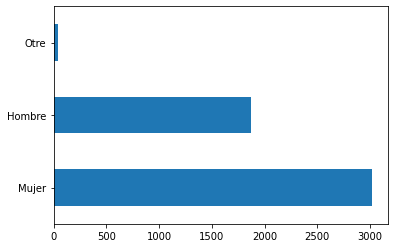

In [15]:
df['Género'].value_counts().plot(kind='barh');

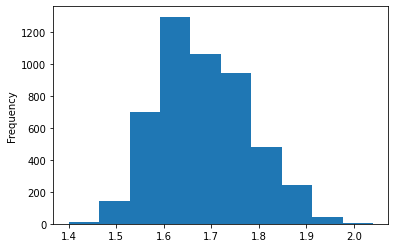

In [16]:
df[df['Altura en metros'] >= 1.4]['Altura en metros'].plot(kind='hist', bins=10);

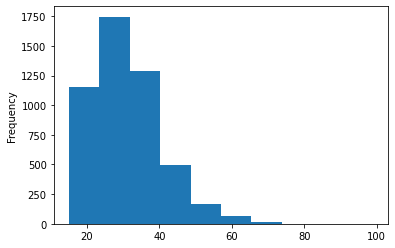

In [17]:
df['Edad'].plot(kind='hist', bins=10);

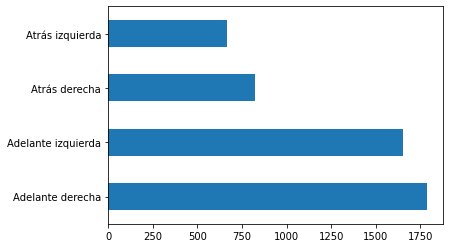

In [18]:
df['Hornalla favorita'].value_counts().plot(kind='barh');

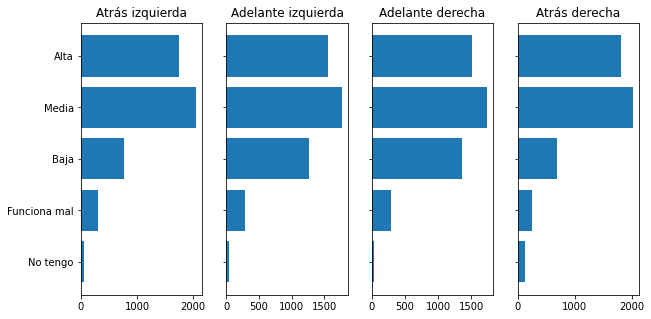

In [19]:
f, axes = plt.subplots(1, 4, figsize=(10, 5))

intensities = ['No tengo', 'Funciona mal', 'Baja', 'Media', 'Alta']
for i, name in enumerate(['Atrás izquierda', 'Adelante izquierda', 'Adelante derecha', 'Atrás derecha']):
    axes[i].set_title(name)
    axes[i].barh(
        intensities,
        width=df[f'¿Cómo caracterizarías la intensidad de tus hornallas? [{name}]'].value_counts()[intensities]
    );
    if i != 0:
        axes[i].set_yticklabels([])

In [20]:
df['La cocina es'] = df['La cocina es'].apply(lambda v: {
    'Eléctrica': 'Eléctrica',
    'Combinada': 'Combinada',
    'Mixta': 'Combinada',
    'Eléctrica vitroceramico': 'Eléctrica',
    'Ambas': 'Combinada',
    'combinada': 'Combinada',
    'Eléctrica y a gas': 'Combinada',
    'Ambas. Horno eléctrico. Anafe a gas': 'Combinada',
    'Combinada': 'Combinada',
    'Combinada papá': 'Combinada',
    'Vitroceramica por inducción bueh algo así re largo era': 'Eléctrica',
    '3 hornallas a gas, 1 eléctrica': 'Combinada',
    '3 hornallas a gas. 1 hornalla eléctrica. Horna eléctrico.': 'Combinada',
    'ambas': 'Combinada',
    'Combinada (hornallas a gas, horno eléctrico)': 'Combinada',
    'A la derecha tengo dos hornallas; a la izquierda, vitrocerámica. No uso la vitro por consumo.': 'Combinada',
    'Ambas. Y tiene 6 hornallas y uso la del medio adelante..': 'Combinada',
    'Y tiene 5 hornallas, prefiero la del centro. Tuve que marcar la 2a favorita': 'Combinada',
    'tengo ambas pero uso las hornallas de la que es a gas': 'Combinada',
    'Combinada (3 horanallas a gas, una eléctrica, horno eléctrico)': 'Combinada',
}.get(v, 'A gas'))
df

,Género,Edad,Altura en metros,Hornalla favorita,¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda],¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha],¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha],La cocina es,¿Con qué encendés las hornallas?,¿Con qué frecuencia usás una hornalla?,¿Cuál es tu mano más hábil?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa?,¿Hacia qué lado del anafe tenés mesada?
0,Hombre,27.0,1.80,Adelante derecha,Alta,Alta,Alta,Alta,Eléctrica,Es automático,Todos los días,Derecha,No,No,Izquierda
1,Mujer,25.0,1.65,Adelante derecha,Funciona mal,Baja,Media,No tengo,A gas,Encendedor;Fósforos,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Derecha
2,Mujer,24.0,1.56,Adelante izquierda,Baja,Alta,Media,Alta,A gas,Encendedor,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda
3,Mujer,22.0,1.63,Adelante izquierda,Media,Alta,Baja,Baja,A gas,Fósforos,Todos los días,Izquierda,No,No,Derecha
4,Mujer,48.0,1.55,Atrás izquierda,Media,Media,Baja,No tengo,A gas,Encendedor,Todos los días,Derecha,No,No,Izquierda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Mujer,22.0,1.60,Adelante derecha,Alta,Baja,Media,Alta,A gas,Es automático,Todos los días,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda;Derecha
4929,Hombre,38.0,1.75,Atrás derecha,Alta,Alta,Alta,Alta,A gas,Encendedor,Todos los días,Derecha,No,No,Derecha
4930,Mujer,25.0,1.61,Adelante izquierda,Funciona mal,Media,Baja,Media,A gas,Encendedor,Todos los días,Izquierda,No,No,Izquierda
4931,Hombre,22.0,1.72,Adelante izquierda,Alta,Alta,Baja,Media,A gas,Encendedor,Día por medio,Derecha,No,"Sí, pero no creo que tocarían el fuego",Izquierda


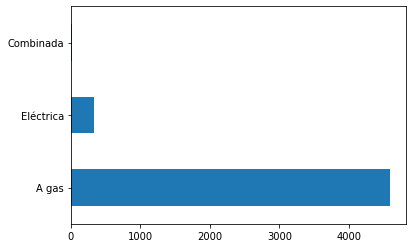

In [21]:
df['La cocina es'].value_counts().plot(kind='barh');

In [22]:
df['¿Con qué encendés las hornallas?'].value_counts().head(7)

Encendedor             1105
Botón de la cocina      977
Fósforos                912
Encendedor;Fósforos     473
Magiclik                449
Es automático           397
Magiclik;Fósforos       127
Name: ¿Con qué encendés las hornallas?, dtype: int64

In [23]:
df['¿Con qué encendés las hornallas?'] = df['¿Con qué encendés las hornallas?'].apply(lambda v: {
    'Encendedor sin gas': 'Encendedor',
    'Una fosforos y otra automatica': 'Fósforos;Es automático',
    'Chispero incorporado': 'Botón de la cocina',
    'Encendedor;Fósforos;Handy bic': 'Encendedor;Fósforos;Magiclik',
    'Chispa de encendedor sin gas': 'Encendedor',
    'Perillas': 'Botón de la cocina',
    'Magiclik;es automatica pero ultimamente anda como el orto, asi que magiclik': 'Magiclik',
    'La chispa que tenga más cerca': 'Encendedor;Fósforos',
    'perillas, que se giran en dirección contraria o en sentido de las agujas del reloj': 'Botón de la cocina',
    'Fósforos;Actualmente con nada porque no tengo gas y uso una eléctrica': 'Fósforos',
    'Un encendedor que solo hace chispa': 'Encendedor',
    'Encendedor sin gas (magiclick que nunca se acaba)': 'Encendedor',
    'Tiene magiclick el anafe': 'Botón de la cocina',
    'Magiclik;Fósforos;Botón de la cocina;Tenía boton pero se rompió': 'Magiclik;Fósforos',
    'mediante perilla con la que a la vez elijo la potencia': 'Botón de la cocina',
    'Magiclick': 'Magiclik',
    'Encendedor;Palitos o papel': 'Encendedor',
    'Encendedor;Es un encendedor gastado que no tiene gas, así q es por las chispas de la piedra': 'Encendedor',
    'dos prenden con el boton las otras 2 a fosforo': 'Botón de la cocina;Fósforos',
    'Encendedor;Encendedor sin gas. Solo la chispa ': 'Encendedor',
    'Encendedor gastado': 'Encendedor',
    'Encendedor sin carga que cumple función de magiclik': 'Encendedor',
    'Pedernal o chispero (el que se usa para prender las soldadoras)': 'Otros',
    'Con las velitas largas del súper, que enciendo en el piloto del calefón': 'Otros',
    'Fósforos;Vela': 'Fósforos;Encendedor',
    'Encendedor;En general el encendedor no funciona y sirve como chispero': 'Encendedor',
    'Botón pero ta roto entonces uso mi hornalla no favorita 🥺': 'Botón de la cocina',
    'Se supone que magiclik pero fosforos porque no anda': 'Fósforos',
    'Encendedor viejo, sin gas. ': 'Encendedor',
    'Fósforos;Botón de la cocina;Mi favorita es la única que enciende con el botón de la cocina, las otras las tengo que encender con fósforos': 'Fósforos;Botón de la cocina',
    'Encededor que anda para el horno y que no funciona para hornallas': 'Otros',
    'Variado, depende de si anda o no el magiclik': 'Magiclik;Encendedor;Fósforos',
    'Chispa de encendedor sin llama': 'Encendedor',
    'La perilla tiene una posición que activa el piezo.': 'Botón de la cocina',
    'encendedor sin llama': 'Encendedor',
    'Encendedor sin gas.': 'Encendedor',
    'Fósforos;Es automático; Se me rompió el magiclick cuando compré el repuesto de gas, antes de la cuarentena': 'Fósforos;Es automático',
    'Lo que encuentre primero': 'Encendedor;Fósforos',
    'Encendedor;Fósforos;Una vez corri desde el living con un papelito encendido': 'Encendedor;Fósforos',
    'Encendedor;Papel prendido fuego con el piloto del calefón ': 'Encendedor;Otros',
    'Perilla, es electrica': 'Es automático',
    'Chispero merak': 'Magiclik',
    'El magiclick solo funciona en mí favorita': 'Botón de la cocina',
    'es eléctrica': 'Es automático',
    'La enchufo': 'Es automático',
    'Botón de la cocina;Electrica': 'Botón de la cocina;Es automático',
    'Encendedor;Una servilleta prendida por la llama del calefón cuando algún gil me roba el encendedor': 'Encendedor;Otros',
    'Encendedor;A veces con un papel': 'Encendedor;Otros',
    'Con una velita': 'Encendedor;Fósforos',
    'Magiclick sin gas': 'Magiclik',
    'Fósforos;Velita': 'Fósforos;Encendedor',
    'Botón de la cocina;Precisamente respondí funciona mal en las 2 q no anda el botón magiclick o como se llame.': 'Botón de la cocina',
    'Encendedor gastado sin gas, solo chispa': 'Encendedor',
    'Es automático;No tengo 2 hornallas delante y 2 detrás, están en las esquinas de un rombo. Una delante, dos al centro, una detrás ': 'Es automático',
    'Encendedor;Magiclik;El botón esta broken': 'Encendedor;Magiclik',
    'Es eléctrica se enciende al mover la perilla': 'Es automático',
    'magicklick mágico que lleva un encendedor bic': 'Magiclik',
    'Símil magiclick, genérico': 'Magiclik',
    'Giro perilla': 'Es automático',
}.get(v, v))

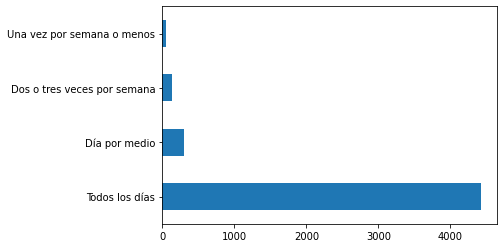

In [24]:
df['¿Con qué frecuencia usás una hornalla?'].value_counts().plot(kind='barh');

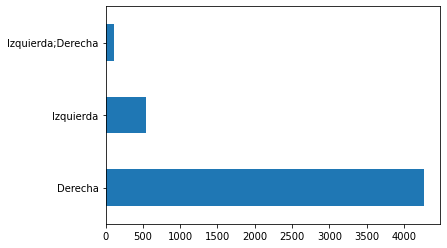

In [25]:
df['¿Cuál es tu mano más hábil?'].value_counts().plot(kind='barh');

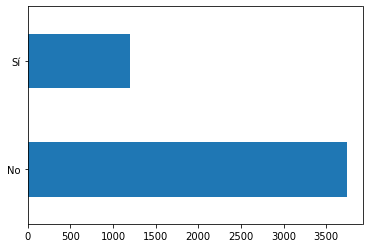

In [26]:
df['¿Tenés niñes menores en tu casa?'].value_counts().plot(kind='barh');

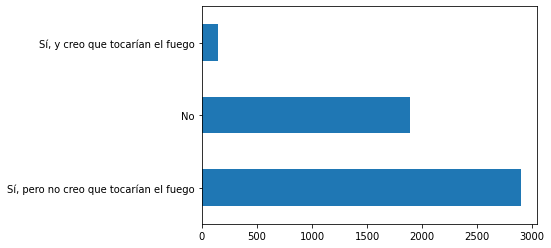

In [27]:
df['¿Tenés mascotas en tu casa?'].value_counts().plot(kind='barh');

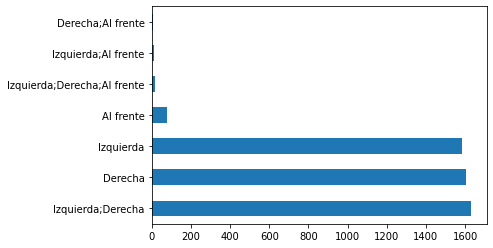

In [28]:
df['¿Hacia qué lado del anafe tenés mesada?'].value_counts().plot(kind='barh');

# Hipótesis a testear

## Se usa más la correspondiente a la mano hábil.

In [29]:
df['righthanded'] = df['¿Cuál es tu mano más hábil?'] == 'Derecha'
df['lefthanded'] = df['¿Cuál es tu mano más hábil?'] == 'Izquierda'
df['ambidextrous'] = df['¿Cuál es tu mano más hábil?'] == 'Izquierda;Derecha'
df['favorite_hob_front'] = (df['Hornalla favorita'] == 'Adelante izquierda') | (df['Hornalla favorita'] == 'Adelante derecha')
df['favorite_hob_left'] = (df['Hornalla favorita'] == 'Adelante izquierda') | (df['Hornalla favorita'] == 'Atrás izquierda')

In [30]:
df[['lefthanded', 'favorite_hob_left']].corr()

,lefthanded,favorite_hob_left
lefthanded,1.000000,0.031906
favorite_hob_left,0.031906,1.000000


In [31]:
pearsonr(df['lefthanded'], df['favorite_hob_left'])[1]

0.025032479655429887

In [108]:
df0, df1

(Zurdos que prefieren hornalla izquierda    278
 Zurdos que prefieren hornalla derecha      261
 Name: favorite_hob_left, dtype: int64,
 Diestros que prefieren hornalla derecha      2352
 Diestros que prefieren hornalla izquierda    2042
 Name: favorite_hob_left, dtype: int64)

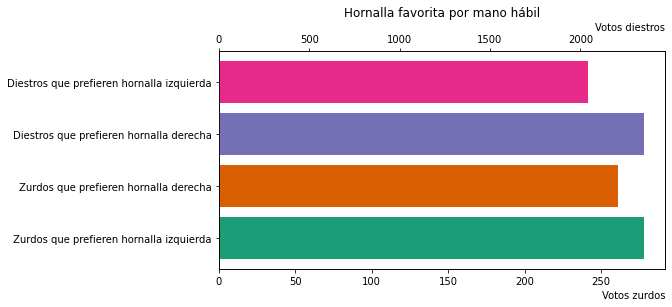

In [106]:
df0 = df[df['lefthanded']]['favorite_hob_left'].value_counts().rename({
    True: 'Zurdos que prefieren hornalla izquierda',
    False: 'Zurdos que prefieren hornalla derecha',
})
df1 = df[~df['lefthanded']]['favorite_hob_left'].value_counts().rename({
    True: 'Diestros que prefieren hornalla izquierda',
    False: 'Diestros que prefieren hornalla derecha',
})
_, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.barh(y=[0, 1],
         width=df0.values,
         color=[cmap(i) for i in range(2)]
)

tw = plt.twiny()
tw.barh(y=[2, 3],
         width=df1.values,
         color=[cmap(i) for i in range(2, 4)]
)
ax.set_xlabel('Votos zurdos', loc='right')
tw.set_xlabel('Votos diestros', loc='right')
plt.yticks([0, 1, 2, 3], labels=[df0.index[0], df0.index[1], df1.index[0], df1.index[1]])
plt.title('Hornalla favorita por mano hábil')
None

## Se usa más la que tiene del lado de la mesada


In [33]:
df['counter_only_left'] = (df['¿Hacia qué lado del anafe tenés mesada?'] == 'Izquierda') | (df['¿Hacia qué lado del anafe tenés mesada?'] == 'Izquierda;Al frente')
df['counter_only_right'] = (df['¿Hacia qué lado del anafe tenés mesada?'] == 'Derecha') | (df['¿Hacia qué lado del anafe tenés mesada?'] == 'Derecha;Al frente')
df['counter_only_left'].sum(), df['counter_only_right'].sum()

(1597, 1610)

In [34]:
df[['favorite_hob_left', 'counter_only_left']].corr()

,favorite_hob_left,counter_only_left
favorite_hob_left,1.000000,0.198715
counter_only_left,0.198715,1.000000


In [35]:
pearsonr(df['favorite_hob_left'], df['counter_only_left'])[1]

4.1327183151840396e-45

In [36]:
pearsonr(df['lefthanded'], df['favorite_hob_left'])[1]

0.025032479655429887

In [37]:
df[['favorite_hob_left', 'counter_only_right']].corr()

,favorite_hob_left,counter_only_right
favorite_hob_left,1.000000,-0.208916
counter_only_right,-0.208916,1.000000


In [38]:
pearsonr(df['favorite_hob_left'], df['counter_only_right'])[1]

8.891747462557685e-50

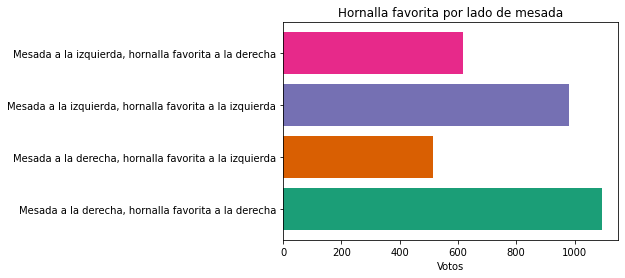

In [115]:
df0 = pd.concat((
    df[df['counter_only_right']]['favorite_hob_left'].value_counts().rename({
        True: 'Mesada a la derecha, hornalla favorita a la izquierda',
        False: 'Mesada a la derecha, hornalla favorita a la derecha',
    }),
    df[df['counter_only_left']]['favorite_hob_left'].value_counts().rename({
        True: 'Mesada a la izquierda, hornalla favorita a la izquierda',
        False: 'Mesada a la izquierda, hornalla favorita a la derecha',
    }),
))
plt.barh(y=df0.index,
         width=df0.values,
         color=[cmap(i) for i in range(len(df0.index))]
)

plt.title('Hornalla favorita por lado de mesada')
plt.xlabel('Votos')
None

In [116]:
df0

Mesada a la derecha, hornalla favorita a la derecha        1094
Mesada a la derecha, hornalla favorita a la izquierda       516
Mesada a la izquierda, hornalla favorita a la izquierda     980
Mesada a la izquierda, hornalla favorita a la derecha       617
Name: favorite_hob_left, dtype: int64

## Se usa más la de atrás si se tienen niñes.


In [39]:
# niñes, preferida atrás
df['has_children'] = df['¿Tenés niñes menores en tu casa?'] == 'Sí'
df[['has_children', 'favorite_hob_front']].corr()

,has_children,favorite_hob_front
has_children,1.000000,-0.168385
favorite_hob_front,-0.168385,1.000000


In [40]:
pearsonr(df['has_children'], df['favorite_hob_front'])[1]

1.0664120735261069e-32

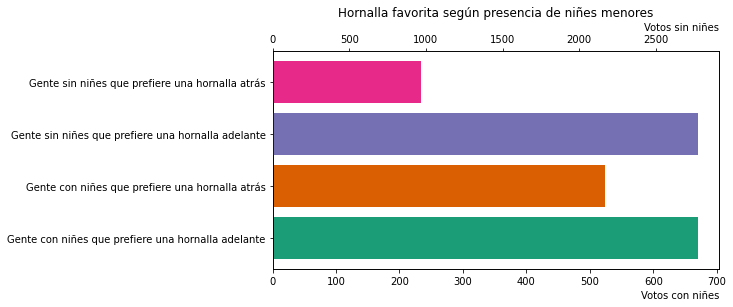

In [119]:
df0 = df[df['has_children']]['favorite_hob_front'].value_counts().rename({
    True: 'Gente con niñes que prefiere una hornalla adelante',
    False: 'Gente con niñes que prefiere una hornalla atrás',
})
df1 = df[~df['has_children']]['favorite_hob_front'].value_counts().rename({
    True: 'Gente sin niñes que prefiere una hornalla adelante',
    False: 'Gente sin niñes que prefiere una hornalla atrás',
})
_, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.barh(y=[0, 1],
         width=df0.values,
         color=[cmap(i) for i in range(2)]
)

tw = plt.twiny()
tw.barh(y=[2, 3],
         width=df1.values,
         color=[cmap(i) for i in range(2, 4)]
)
ax.set_xlabel('Votos con niñes', loc='right')
tw.set_xlabel('Votos sin niñes', loc='right')
plt.yticks([0, 1, 2, 3], labels=[df0.index[0], df0.index[1], df1.index[0], df1.index[1]])
plt.title('Hornalla favorita según presencia de niñes menores')
None

## Se usa más la de atrás si es alta la persona.

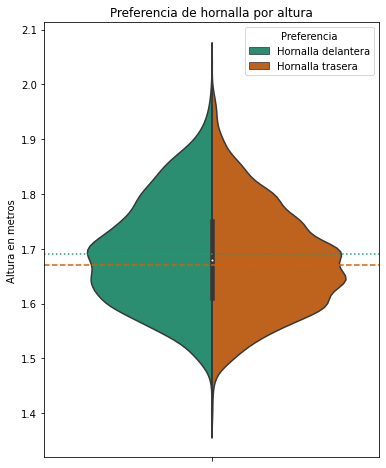

In [144]:
from matplotlib.lines import Line2D
import seaborn as sns

_, ax0 = plt.subplots(1, 1, figsize=(6, 8));
df[''] = ''
sns.violinplot(
    hue='favorite_hob_front',
    y='Altura en metros',
    x='',
    data=df[df['Altura en metros'] >= 1.4],
    ax=ax0,
    split=True,
    palette='Dark2'
);
ax0.set_title('Preferencia de hornalla por altura')
ax0.axhline(df[~df['favorite_hob_front']]['Altura en metros'].median(), c=cmap(0), linestyle='dotted')
ax0.axhline(df[df['favorite_hob_front']]['Altura en metros'].median(), c=cmap(1), linestyle='dashed')
ax0.get_legend().set_title('Preferencia')
ax0.get_legend().get_texts()[0].set_text('Hornalla delantera')
ax0.get_legend().get_texts()[1].set_text('Hornalla trasera')

In [42]:
kstest(df[df['favorite_hob_front']]['Altura en metros'], df[~df['favorite_hob_front']]['Altura en metros'])

KstestResult(statistic=0.06744625317003472, pvalue=0.00014635707574850443)

In [123]:
(
df[df['favorite_hob_front']]['Altura en metros'].quantile(.25),
df[df['favorite_hob_front']]['Altura en metros'].quantile(.5),
df[df['favorite_hob_front']]['Altura en metros'].quantile(.75),
df[~df['favorite_hob_front']]['Altura en metros'].quantile(.25),
df[~df['favorite_hob_front']]['Altura en metros'].quantile(.5),
df[~df['favorite_hob_front']]['Altura en metros'].quantile(.75)
)

(1.6, 1.67, 1.74, 1.62, 1.69, 1.76)

## Se usa más la de adelante si se prende con encendedor.

In [43]:
#'favorite_hob_front
subdf = df[(df['¿Con qué encendés las hornallas?'] == 'Encendedor') | (df['¿Con qué encendés las hornallas?'].fillna('').apply(lambda v: 'Encendedor' not in v))]
subdf['lighter'] = subdf['¿Con qué encendés las hornallas?'] == 'Encendedor'
subdf[['lighter', 'favorite_hob_front']].corr()

<ipython-input-43-5f25d1c7581d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['lighter'] = subdf['¿Con qué encendés las hornallas?'] == 'Encendedor'


,lighter,favorite_hob_front
lighter,1.000000,0.069255
favorite_hob_front,0.069255,1.000000


In [44]:
pearsonr(subdf['lighter'], subdf['favorite_hob_front'])[1]

7.520706938047332e-06

## Se usa más la hornalla más fuerte.


In [45]:
df[[
    '¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]',
    '¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]',
    '¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha]',
    '¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]',
]].apply(lambda row: row.values.tolist().count('Alta'), axis=1).value_counts()

1    2308
2    1069
0     938
4     343
3     275
dtype: int64

In [46]:
df['is_favorite_high'] = df.apply(lambda row: row[f'¿Cómo caracterizarías la intensidad de tus hornallas? [{row["Hornalla favorita"]}]'] == 'Alta', axis=1)
df['num_high'] = df.apply(lambda row: (
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]'] == 'Alta')
), axis=1)
df['num_functioning'] = df.apply(lambda row:(
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]'] in ('Alta', 'Media', 'Baja'))
), axis=1)
df[['is_favorite_high', 'num_high', 'num_functioning']]

,is_favorite_high,num_high,num_functioning
0,True,4,4
1,False,0,2
2,True,2,4
3,True,1,4
4,False,0,3
...,...,...,...
4928,False,2,4
4929,True,4,4
4930,False,0,3
4931,True,2,4


In [47]:
subdf = df[(df['num_high'] != df['num_functioning']) & (df['num_high'] != 0)]
subdf[['is_favorite_high', 'num_high', 'num_functioning']]

,is_favorite_high,num_high,num_functioning
2,True,2,4
3,True,1,4
6,True,1,4
9,True,2,4
11,True,1,4
...,...,...,...
4925,True,1,4
4926,True,2,3
4927,True,2,3
4928,False,2,4


In [48]:
subdf.loc[:, 'high_ratio'] = subdf['num_high'] / subdf['num_functioning']
subdf[['is_favorite_high', 'high_ratio']]

/home/seppo/.local/share/virtualenvs/hornallas-Io0JmHZs/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/seppo/.local/share/virtualenvs/hornallas-Io0JmHZs/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,is_favorite_high,high_ratio
2,True,0.500000
3,True,0.250000
6,True,0.250000
9,True,0.500000
11,True,0.250000
...,...,...
4925,True,0.250000
4926,True,0.666667
4927,True,0.666667
4928,False,0.500000


In [49]:
agg = subdf[['is_favorite_high', 'high_ratio']].astype(float).groupby('high_ratio').agg(['count', 'sum', 'mean']).reset_index()
agg.columns = ['high_ratio', 'n', 'favorite_high', 'favorite_high_ratio']
agg

,high_ratio,n,favorite_high,favorite_high_ratio
0,0.250000,1707,807.0,0.472759
1,0.333333,481,284.0,0.590437
2,0.500000,962,642.0,0.667360
3,0.666667,183,155.0,0.846995
4,0.750000,227,185.0,0.814978


In [50]:
agg.apply(lambda row: 1-binom.cdf(p=row['high_ratio'], n=row['n'], k=row['favorite_high']), axis=1)

0    1.110223e-16
1    1.110223e-16
2    1.110223e-16
3    9.967325e-09
4    8.092875e-03
dtype: float64

## La edad no es predictora de la hornalla.


In [51]:
kstest(df[df['favorite_hob_front']]['Edad'], df[~df['favorite_hob_front']]['Edad'])

KstestResult(statistic=0.13482428115015974, pvalue=3.3306690738754696e-15)

In [52]:
kstest(df[df['favorite_hob_left']]['Edad'], df[~df['favorite_hob_left']]['Edad'])

KstestResult(statistic=0.015538520923235282, pvalue=0.9218322108164706)

''

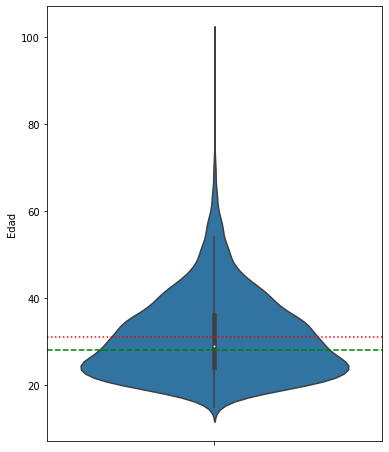

In [53]:
from matplotlib.lines import Line2D
import seaborn as sns

_, ax0 = plt.subplots(1, 1, figsize=(6, 8));

sns.violinplot(
    hue='favorite_hob_front',
    y='Edad',
    data=df,
    ax=ax0,
    split=True,
);
ax0.axhline(df[~df['favorite_hob_front']]['Edad'].median(), c='red', linestyle='dotted')
ax0.axhline(df[df['favorite_hob_front']]['Edad'].median(), c='green', linestyle='dashed')
;

In [54]:
subdf = df[df['¿Tenés niñes menores en tu casa?'] != 'Sí']
kstest(subdf[subdf['favorite_hob_front']]['Edad'], subdf[~subdf['favorite_hob_front']]['Edad'])

KstestResult(statistic=0.05470079343924967, pvalue=0.026264282763553637)

## Los hombres tienen más prevalencia de la hornalla de mayor intensidad

In [55]:
subdf = df[(df['num_high'] != df['num_functioning']) & (df['num_high'] != 0)]
h_df = subdf[subdf['Género'] == 'Hombre']
m_df = subdf[subdf['Género'] == 'Mujer']

h_df['is_favorite_high'] = h_df.apply(lambda row: row[f'¿Cómo caracterizarías la intensidad de tus hornallas? [{row["Hornalla favorita"]}]'] == 'Alta', axis=1)
h_df['num_high'] = h_df.apply(lambda row: (
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]'] == 'Alta')
), axis=1)
h_df['num_functioning'] = h_df.apply(lambda row:(
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]'] in ('Alta', 'Media', 'Baja'))
), axis=1)
h_df[['is_favorite_high', 'num_high', 'num_functioning']]

m_df['is_favorite_high'] = m_df.apply(lambda row: row[f'¿Cómo caracterizarías la intensidad de tus hornallas? [{row["Hornalla favorita"]}]'] == 'Alta', axis=1)
m_df['num_high'] = m_df.apply(lambda row: (
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha]'] == 'Alta') +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]'] == 'Alta')
), axis=1)
m_df['num_functioning'] = m_df.apply(lambda row:(
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante derecha]'] in ('Alta', 'Media', 'Baja')) +
    (row['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]'] in ('Alta', 'Media', 'Baja'))
), axis=1)
m_df[['is_favorite_high', 'num_high', 'num_functioning']]

h_df.loc[:, 'high_ratio'] = h_df['num_high'] / h_df['num_functioning']
m_df.loc[:, 'high_ratio'] = m_df['num_high'] / m_df['num_functioning']

h_agg = h_df[['is_favorite_high', 'high_ratio']].astype(float).groupby('high_ratio').agg(['count', 'sum', 'mean']).reset_index()
h_agg.columns = ['high_ratio', 'n', 'favorite_high', 'favorite_high_ratio']

m_agg = m_df[['is_favorite_high', 'high_ratio']].astype(float).groupby('high_ratio').agg(['count', 'sum', 'mean']).reset_index()
m_agg.columns = ['high_ratio', 'n', 'favorite_high', 'favorite_high_ratio']

pd.concat((
    h_agg.apply(lambda row: 1-binom.cdf(p=row['high_ratio'], n=row['n'], k=row['favorite_high']), axis=1),
    m_agg.apply(lambda row: 1-binom.cdf(p=row['high_ratio'], n=row['n'], k=row['favorite_high']), axis=1),
), axis=1).rename({0: 'Hombre', 1: 'Mujer'}, axis=1)

<ipython-input-55-8ba17a226240>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df['is_favorite_high'] = h_df.apply(lambda row: row[f'¿Cómo caracterizarías la intensidad de tus hornallas? [{row["Hornalla favorita"]}]'] == 'Alta', axis=1)
<ipython-input-55-8ba17a226240>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df['num_high'] = h_df.apply(lambda row: (
<ipython-input-55-8ba17a226240>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Hombre,Mujer
0,1.110223e-16,1.110223e-16
1,1.648903e-12,1.110223e-16
2,3.641520e-11,2.220446e-16
3,5.399223e-04,8.466900e-07
4,9.649085e-02,1.311478e-02


## El género no predice la preferencia de la hornalla

In [56]:
pd.concat((df['Género'] == 'Hombre', df['favorite_hob_front']), axis=1).corr()

,Género,favorite_hob_front
Género,1.000000,-0.046217
favorite_hob_front,-0.046217,1.000000


In [57]:
pearsonr(df['Género'] == 'Hombre', df['favorite_hob_front'])[1]

0.0011664560731221906

In [58]:
pearsonr(df['Género'] == 'Hombre', df['favorite_hob_left'])[1]

0.11951077358462847

In [59]:
subdf = df[df['¿Tenés niñes menores en tu casa?'] != 'Sí']
pearsonr(subdf['Género'] == 'Hombre', subdf['favorite_hob_front'])[1]

0.135043292501752

In [60]:
pd.concat((df['Género'] == 'Hombre', df['¿Tenés niñes menores en tu casa?'] == 'Sí'), axis=1).corr()

,Género,¿Tenés niñes menores en tu casa?
Género,1.000000,0.064264
¿Tenés niñes menores en tu casa?,0.064264,1.000000


## Las mujeres usan hornallas más asiduamente que hombres.

In [61]:
pd.concat((df['Género'] == 'Hombre', df['¿Con qué frecuencia usás una hornalla?'] == 'Todos los días'), axis=1).corr()

,Género,¿Con qué frecuencia usás una hornalla?
Género,1.000000,-0.051183
¿Con qué frecuencia usás una hornalla?,-0.051183,1.000000


In [62]:
pearsonr(df['Género'] == 'Hombre', df['¿Con qué frecuencia usás una hornalla?'] == 'Todos los días')[1]

0.0003227990762772663

# Modelo

In [63]:
X = pd.concat((
    df['Altura en metros'],
    df['¿Con qué encendés las hornallas?'].fillna('').apply(lambda v: 'Encendedor' not in v).rename('¿Encendés las hornallas con encendedor?'),
    df['¿Tenés niñes menores en tu casa?'] == 'Sí',
    (df['¿Tenés mascotas en tu casa?'] == 'Sí, y creo que tocarían el fuego').rename('¿Tenés mascotas en tu casa que tocarían el fuego?'),
    ((df['¿Hacia qué lado del anafe tenés mesada?'] == 'Izquierda') | (df['¿Hacia qué lado del anafe tenés mesada?'] == 'Izquierda;Al frente')).rename('¿Tenés mesada a la izquierda pero no a la derecha?'),
    ((df['¿Hacia qué lado del anafe tenés mesada?'] == 'Derecha') | (df['¿Hacia qué lado del anafe tenés mesada?'] == 'Derecha;Al frente')).rename('¿Tenés mesada a la derecha pero no a la izquierda?'),
    ((df['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] == 'Alta') | (df['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás derecha]'] == 'Alta')).rename('¿Hay una hornalla de alta intensidad atrás?'),
    ((df['¿Cómo caracterizarías la intensidad de tus hornallas? [Atrás izquierda]'] == 'Alta') | (df['¿Cómo caracterizarías la intensidad de tus hornallas? [Adelante izquierda]'] == 'Alta')).rename('¿Hay una hornalla de alta intensidad a la izquierda?'),
), axis=1)
ys = pd.concat((
    df['favorite_hob_front'],
    df['favorite_hob_left'],
), axis=1)
X

,Altura en metros,¿Encendés las hornallas con encendedor?,¿Tenés niñes menores en tu casa?,¿Tenés mascotas en tu casa que tocarían el fuego?,¿Tenés mesada a la izquierda pero no a la derecha?,¿Tenés mesada a la derecha pero no a la izquierda?,¿Hay una hornalla de alta intensidad atrás?,¿Hay una hornalla de alta intensidad a la izquierda?
0,1.80,True,False,False,True,False,True,True
1,1.65,False,False,False,False,True,False,False
2,1.56,False,False,False,True,False,True,True
3,1.63,True,False,False,False,True,False,True
4,1.55,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
4928,1.60,True,False,False,False,False,True,True
4929,1.75,False,False,False,False,True,True,True
4930,1.61,False,False,False,True,False,False,False
4931,1.72,False,False,False,True,False,True,True


In [64]:
import wittgenstein as lw
from sklearn.model_selection import cross_val_score

class Model:
    def get_params(self, deep=False):
        return {}

    def fit(self, X, y):
        self.front_ = lw.RIPPER()
        self.front_.fit(X, y['favorite_hob_front'])
        self.left_ = lw.RIPPER()
        self.left_.fit(X, y['favorite_hob_left'])

    def predict(self, X):
        df = pd.concat((
            pd.Series(self.front_.predict(X)).rename('favorite_hob_front'),
            pd.Series(self.left_.predict(X)).rename('favorite_hob_left'),
        ), axis=1)
        df.index = X.index
        return df

    def score(self, X, y):
        return pd.concat((self.predict(X).rename({
            'favorite_hob_front': 'favorite_hob_front_estimated',
            'favorite_hob_left': 'favorite_hob_left_estimated',
        }, axis=1), y), axis=1).apply(lambda ea: (
            ea['favorite_hob_front_estimated'] == ea['favorite_hob_front'] and ea['favorite_hob_left_estimated'] == ea['favorite_hob_left_estimated']
        ), axis=1).mean()

cross_val_score(Model(), X, ys, cv=3)

array([0.33495441, 0.34610706, 0.36557178])

In [65]:
h = lw.RIPPER()
h.fit(X, ys['favorite_hob_front'])
h.out_model()

[[¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Tenésniñesmenoresentucasa?=False ^ ¿Hayunahornalladealtaintensidadalaizquierda?=True ^ ¿Encendéslashornallasconencendedor?=False ^ ¿Tenésmesadaaladerechaperonoalaizquierda?=False] V
[¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Tenésniñesmenoresentucasa?=False ^ ¿Hayunahornalladealtaintensidadalaizquierda?=True ^ Alturaenmetros=0.8-1.57] V
[¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Tenésniñesmenoresentucasa?=False] V
[¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Encendéslashornallasconencendedor?=False ^ ¿Hayunahornalladealtaintensidadalaizquierda?=True] V
[¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Hayunahornalladealtaintensidadalaizquierda?=True ^ ¿Tenésmesadaalaizquierdaperonoaladerecha?=True]]


In [66]:
h = lw.RIPPER()
h.fit(X, ys['favorite_hob_left'])
h.out_model()

[[¿Hayunahornalladealtaintensidadalaizquierda?=True ^ ¿Tenésmesadaalaizquierdaperonoaladerecha?=True ^ ¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Tenésniñesmenoresentucasa?=False ^ ¿Encendéslashornallasconencendedor?=False] V
[¿Hayunahornalladealtaintensidadalaizquierda?=True ^ ¿Tenésmesadaalaizquierdaperonoaladerecha?=True ^ ¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Tenésniñesmenoresentucasa?=False] V
[¿Hayunahornalladealtaintensidadalaizquierda?=True ^ ¿Tenésmesadaaladerechaperonoalaizquierda?=False ^ ¿Tenésmesadaalaizquierdaperonoaladerecha?=True] V
[¿Hayunahornalladealtaintensidadalaizquierda?=True ^ ¿Tenésmesadaaladerechaperonoalaizquierda?=False ^ ¿Hayunahornalladealtaintensidadatrás?=False ^ ¿Tenésniñesmenoresentucasa?=False ^ ¿Encendéslashornallasconencendedor?=False] V
[¿Hayunahornalladealtaintensidadalaizquierda?=True ^ ¿Tenésmesadaaladerechaperonoalaizquierda?=False] V
[¿Tenésmesadaalaizquierdaperonoaladerecha?=True ^ ¿Hayunahornalladealtaintensidadatrás?=False]]
